# Plotting functions

## Visualizing statistical relationships

통계 분석은 데이터 세트의 변수가 서로 어떻게 관련되어 있고 이러한 관계가 다른 변수에 어떻게 의존하는지 이해하는 프로세스입니다.   
데이터가 제대로 시각화되면 사람의 눈으로 관계를 나타내는 경향과 패턴을 볼 수 있기 때문에 시각화는 이 프로세스의 핵심 요소라고 할 수 있습니다.   
  
이 튜토리얼에서는 세 가지 seaborn 함수에 대해 설명합니다.  
1. `relplot()` : 일반적인 접근 방식인 산점도와 선그래프를 사용해 통계적 관계를 시각화하기 위한 figure-level 기능
   `relplot()`은 FacetGrid와 다음 두 axes-level 함수 중 하나와 결합합니다.  
    - `scatterplot()` : 기본값, kind = scatter 속성으로 사용  
    - `lineplot()` : kind = line 속성으로 사용

이러한 함수들은 복잡한 데이터 세트 구조를 단순하고 이해하기 쉽게 표현합니다.  
색조(hue), 크기(size) 및 스타일(style) 등 최대 3개의 추가 변수를 매핑하여 2차원 그래픽을 그리기 때문입니다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

## Relating variables with scatter plots
산점도는 통계 시각화의 핵심입니다.  
점 뭉치를 사용하여 두 변수의 공동 분포를 설명합니다. 여기서 각 포인트는 데이터 세트의 관찰을 나타냅니다.  
이 묘사를 통해 눈은 그들 사이에 의미 있는 관계가 있는지 여부에 대한 상당한 양의 정보를 추론할 수 있습니다.  

seaborn에서 산점도를 그리는 방법에는 여러 가지가 있습니다.   
1. `scatterplot()`: 두 변수가 모두 숫자일 때 사용하는 가장 기본적인 방법, 범주형 시각화 자습서에서는 산점도를 사용하여 범주형 데이터를 시각화하는 특수 도구를 볼 수 있습니다. replot()의 기본 플롯 으로 (kind="scatter")를 설정하여 강제 적용할 수도 있습니다.

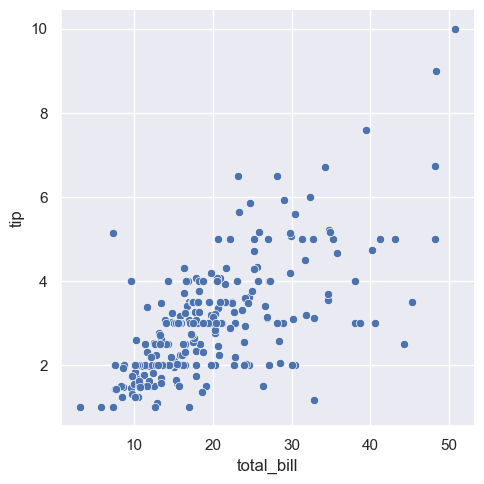

In [2]:
# 데이터세트 로드 및 기본 relplot 작성
tips = sns.load_dataset("tips")
sns.relplot(data=tips, x="total_bill", y="tip")

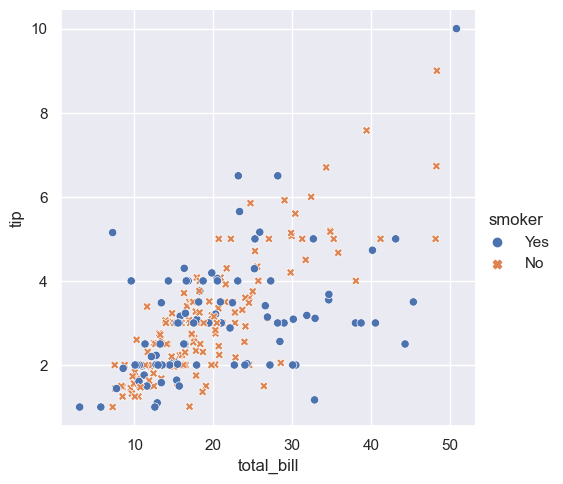

In [3]:
# 클래스간 차이 강조 & 접근성 개선을 위한 마커 스타일 적용
sns.relplot(
    data=tips,
    x="total_bill", y="tip", hue="smoker", style="smoker"
)

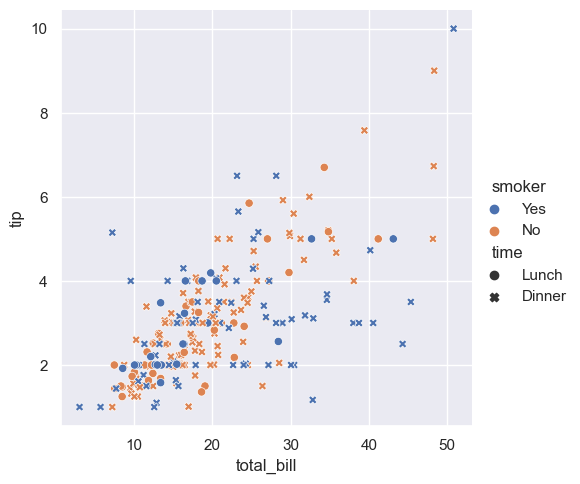

In [4]:
# 색조 및 스타일 분리
# 민감도 : 색상 > 모양
sns.relplot(
    data=tips,
    x="total_bill", y="tip", hue="smoker", style="time",
)

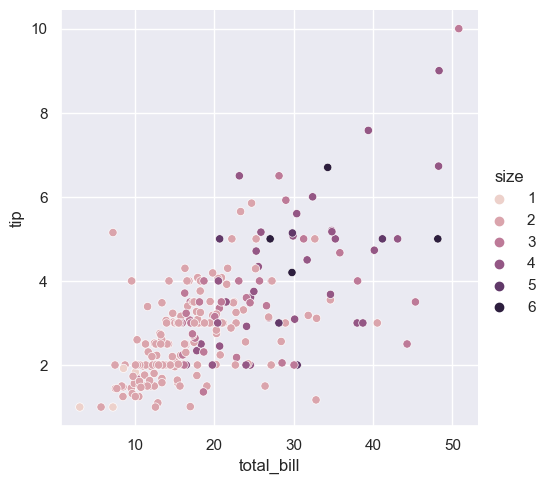

In [5]:
# 색조 변수 - 범주형 : 기본 팔레트 적용
# 색조 변수 - 숫자형(특히 float 타입일 경우) : 그라디언트 팔레트 적용
sns.relplot(
    data=tips, x="total_bill", y="tip", hue="size",
)

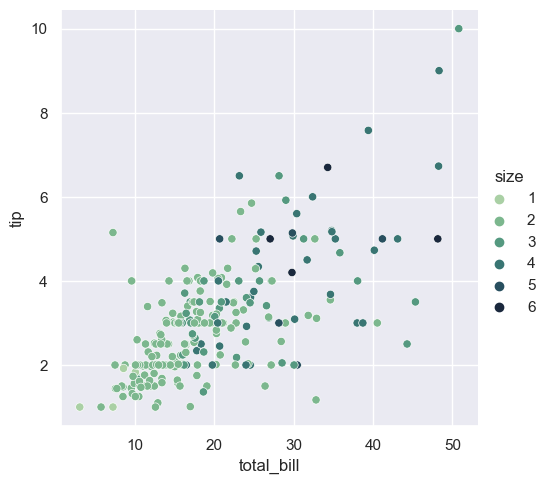

In [6]:
# 기본 적용 팔레트 외 사용자 정의도 가능
# 사용자 정의 예 > cubehelix_palette()의 문자열 인터페이스를 사용한 그라디언트 팔레트 정의
sns.relplot(
    data=tips,
    x="total_bill", y="tip",
    hue="size", palette="ch:r=-.5,l=.75"
)

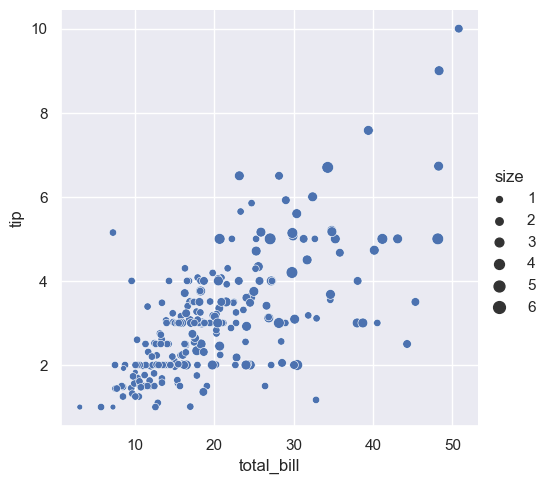

In [7]:
# 포인트 크기 변경 변수
sns.relplot(data=tips, x="total_bill", y="tip", size="size")

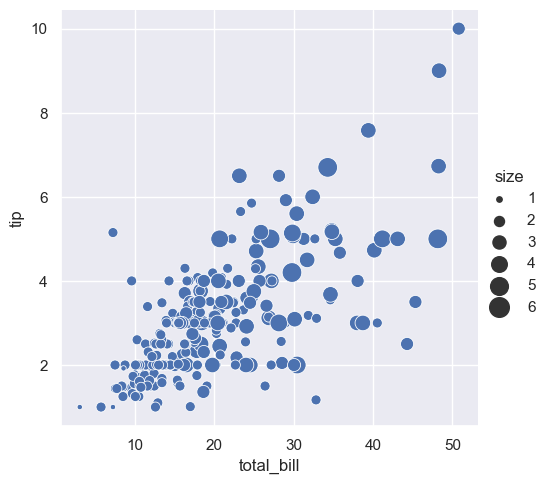

In [8]:
# size 아규먼트 값 : 데이터의 값 범위가 면적 단위의 범위로 정규화
# `matplotlib.pyplot.scatter()`: 점의 영역을 선택하는 데에 사용
# 이 범위 역시 사용자 정의 가능
sns.relplot(
    data=tips, x="total_bill", y="tip",
    size="size", sizes=(15, 200)
)

추가 예제는 scatterplot() API 참고

## Emphasizing continuity with line plots
##### 연속성 강조
산점도는 매우 효과적이지만 항상 최적의 시각화 유형일 수는 없습니다.   
시각적 표현은 데이터세트의 세부사항과 플롯으로 **답변하려는 질문에 맞게 조정**되어야 합니다.   

어떤 데이터세트는 한 변수의 변화를 시간 또는 연속변수로 이해하고자 할 수 있습니다.  
이 때 선그래프는 좋은 선택입니다. lineplot() 함수를 직접 사용하거나 relplot()의 kind="line"을 설정을 사용합니다.

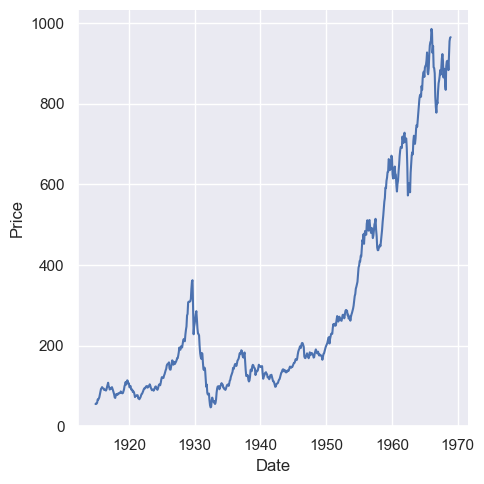

In [9]:
dowjones = sns.load_dataset("dowjones")
sns.relplot(data=dowjones, x="Date", y="Price", kind="line")

**Aggregation and representing uncertainty**  
더 복잡한 데이터세트는 x 변수의 동일한 값에 대해 여러 측정값을 갖습니다.  
seaborn은 기본적으로 평균과 95% 신뢰구간을 플로팅합니다.

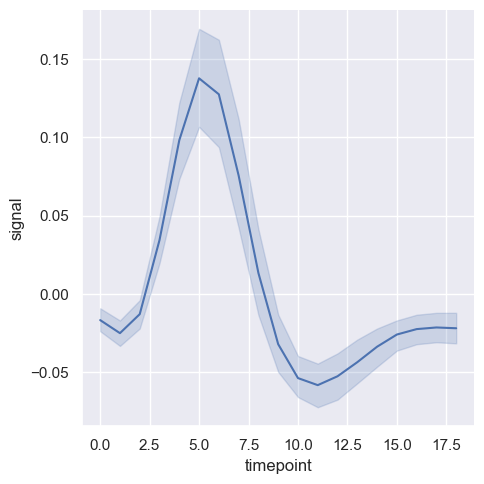

In [10]:
fmri = sns.load_dataset("fmri")
sns.relplot(data=fmri, x="timepoint", y="signal", kind="line")

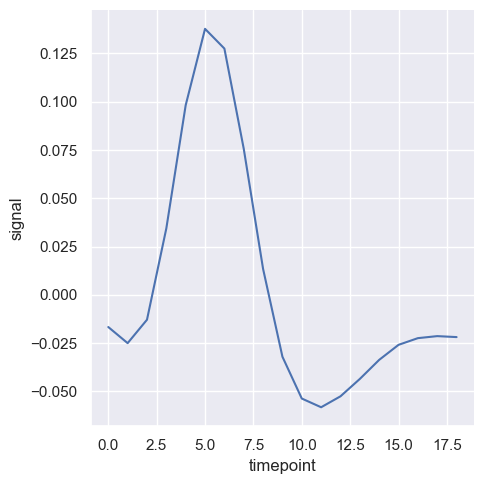

In [27]:
# 신뢰구간(errorbar): 부트스트래핑을 사용한 계산으로 큰 데이터는 시간이 많이 소요될 수 있으므로 필요하지 않을 경우 기능 off
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", errorbar=None,
)

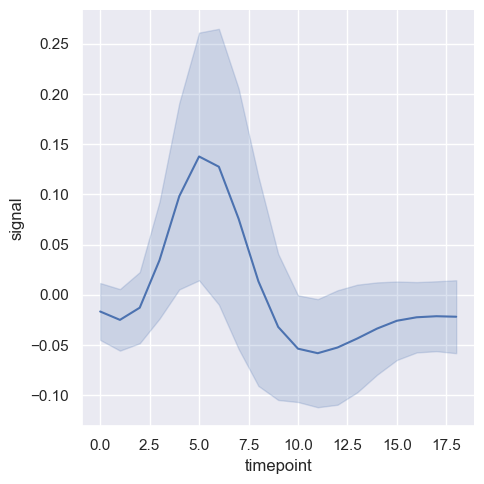

In [12]:
# 신뢰구간 대신 표준 편차(sd)를 플로팅해 각 시점별 분포의 확산 표현 가능
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", errorbar="sd",
)

집계를 하지 않을 경우 추정기(estimator) 파라미터를 없음(None)으로 설정합니다.  
이럴 경우 데이터에 각 지점에 여러 관찰이 있다면 이상한 형태로 그려질 수 있습니다.

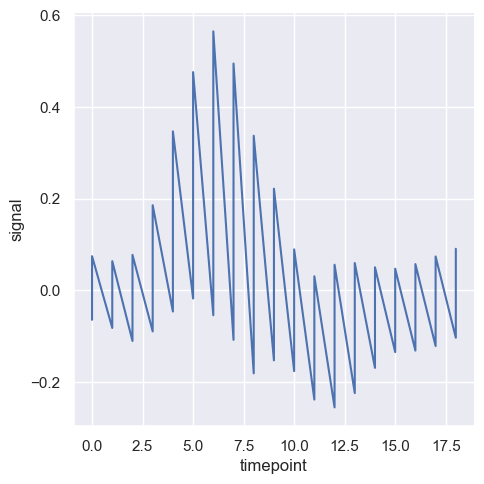

In [13]:

sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal",
    estimator=None,
)

**Plotting subsets of data with semantic mappings**  
`lineplot()` 함수는 `scatterplot()`과 동일한 유연성을 가집니다.  
플롯 요소의 색조(hue), 크기(size) 및 스타일(style)을 수정하여 최대 3개의 추가 변수를 표시할 수 있습니다.  
(= scatterplot()과 동일한 API 사용)

즉, matplotlib에서 선이냐 점이냐 하고 모양을 제어하는 매개변수에 대해 멈추고 생각할 필요가 없습니다.  
  
`lineplot()`에서 시맨틱을 사용하면 데이터가 집계되는 방식도 결정됩니다.  
예를 들어 두 가지 수준의 색조 시맨틱을 추가하면 플롯이 두 개의 선과 오류 밴드로 분할되고 각각에 해당하는 데이터의 하위 집합을 나타내기 위해 색상이 지정됩니다

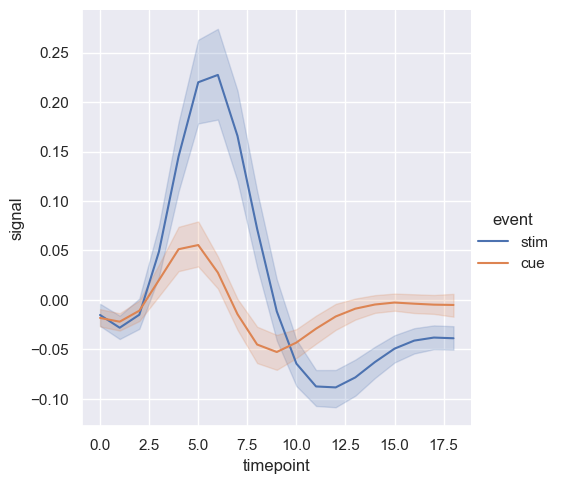

In [14]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", hue="event",
)

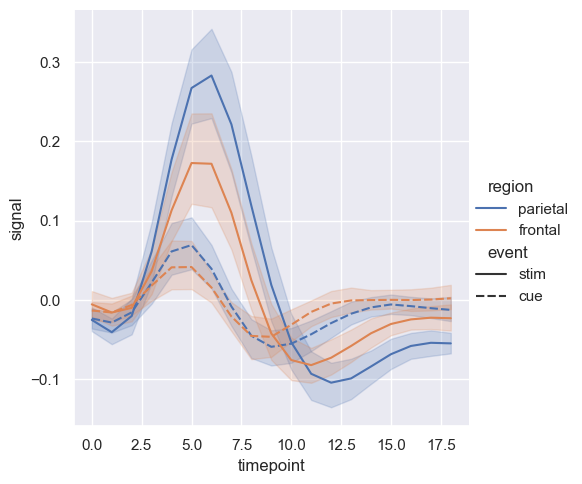

In [15]:
# 라인플롯에 스타일시맨틱 추가 : (기본값) 라인의 대시 패턴 변경
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal",
    hue="region", style="event",
)

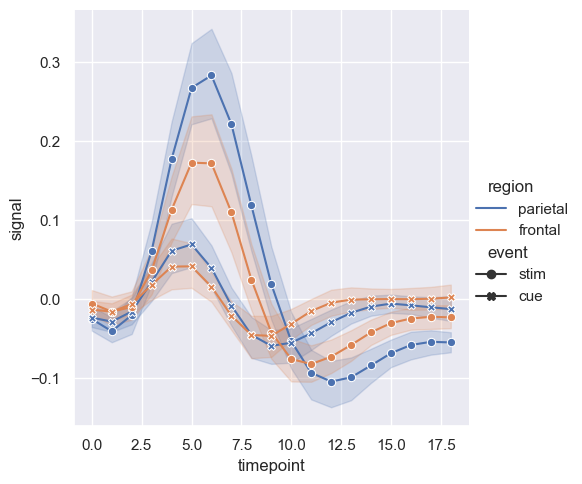

In [16]:
# 마커로 구별
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", hue="region", style="event",
    dashes=False, markers=True,
)

산점도와 마찬가지로 여러 의미 체계를 사용하여 선 그림을 만들 때는 주의해야 합니다.  
때로는 유익하지만 구문 분석하고 해석하기 어려울 수도 있습니다.  
그러나 하나의 추가 변수에 대한 변경 사항만 검사하는 경우에도 선의 색상과 스타일을 모두 변경하는 것이 유용할 수 있습니다.  
이렇게 하면 흑백으로 인쇄하거나 색맹인 사람이 볼 때 플롯에 더 쉽게 접근할 수 있습니다.  

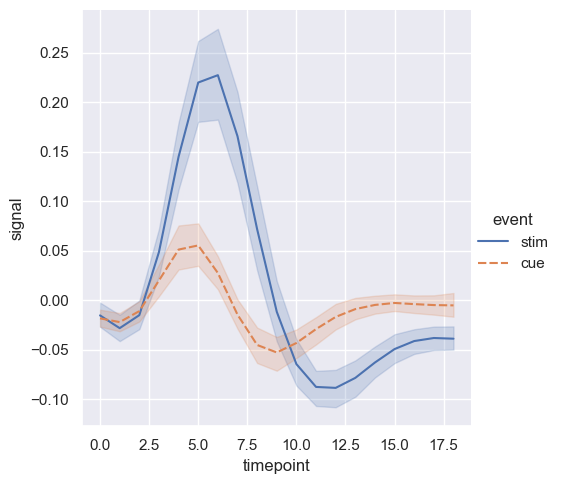

In [17]:
# 접근성(흑백, 색맹 등)을 위해 색과 스타일 모두 분리
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", hue="event", style="event",
)

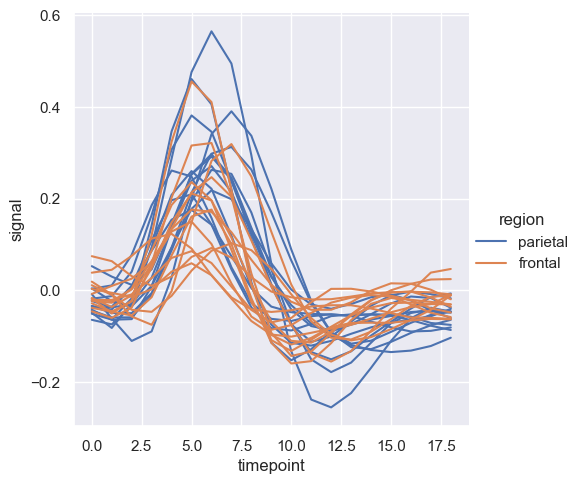

In [18]:
# 샘플링된 단위 있는 경우 : 시맨틱으로 구분하지 않고 개별적으로 표현 > 범례가 복잡해지는 것을 방지
sns.relplot(
    data=fmri.query("event == 'stim'"), kind="line",
    x="timepoint", y="signal", hue="region",
    units="subject", estimator=None,
)

기본 컬러맵과 lineplot()의 범례 처리는 색조 의미 체계가 범주형인지 숫자형인지에 따라 달라집니다.

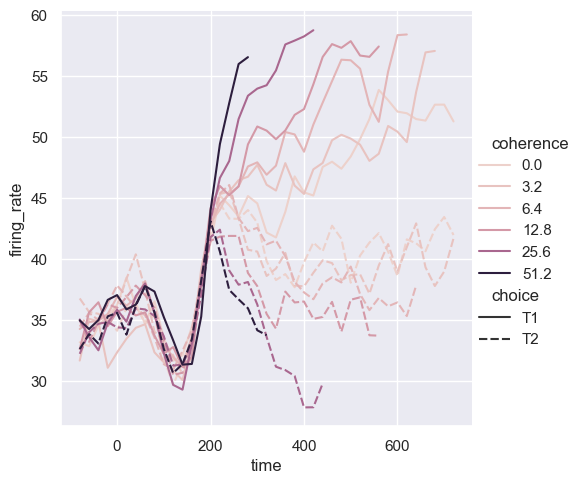

In [19]:
# 숫자형데이터의 색조처리 > 연속적인 그라디언트 색상들
dots = sns.load_dataset("dots").query("align == 'dots'")
sns.relplot(
    data=dots, kind="line",
    x="time", y="firing_rate",
    hue="coherence", style="choice",
)

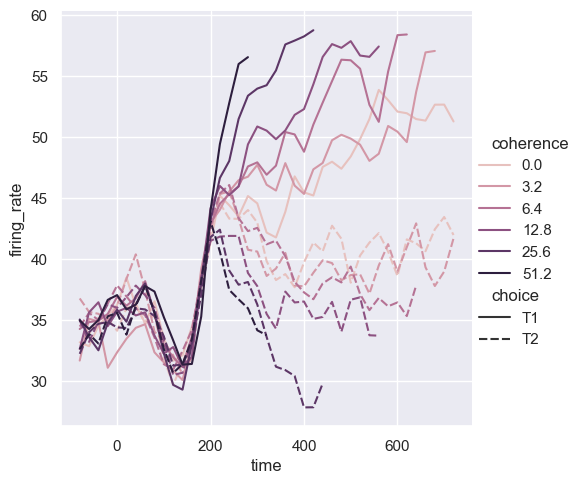

In [21]:
# 리스트/딕셔너리로 색상값을 조정하는 경우 특정 색상 값을 표현 할 수 있으며, 숫자데이터도 그라디언트 색상으로 표현되지 않을 수 있음
palette = sns.cubehelix_palette(light=.8, n_colors=6)
sns.relplot(
    data=dots, kind="line",
    x="time", y="firing_rate",
    hue="coherence", style="choice", palette=palette,
)

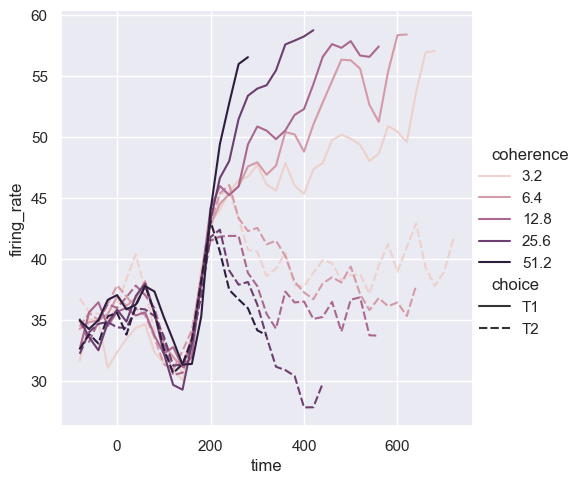

In [22]:
# 색상표 정규화 방식 변경(ex. cubehelix)
from matplotlib.colors import LogNorm
palette = sns.cubehelix_palette(light=.7, n_colors=6)
sns.relplot(
    data=dots.query("coherence > 0"), kind="line",
    x="time", y="firing_rate",
    hue="coherence", style="choice",
    hue_norm=LogNorm(),
)

세 번째 의미인 크기는 줄의 너비를 변경합니다.

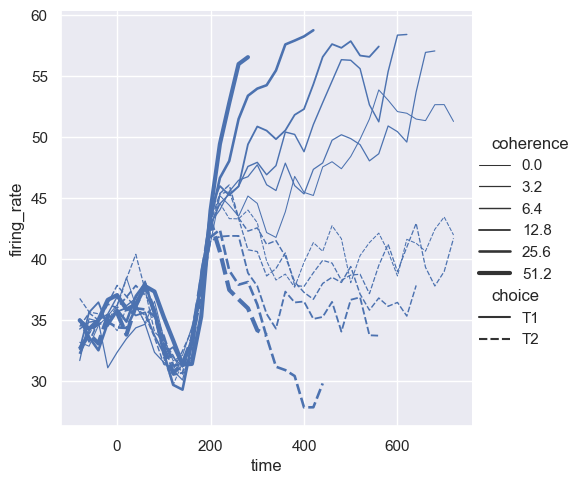

In [23]:
# 크기(size): line 너비 변경
sns.relplot(
    data=dots, kind="line",
    x="time", y="firing_rate",
    size="coherence", style="choice",
)

크기 변수는 일반적으로 숫자이지만 범주형 변수를 선 너비와 매핑할 수도 있습니다.  
"굵은" 선은 "가는" 선보다 훨씬 더 구분하기 어려우니 사용시 주의하십시오.  
선 변동빈도가 높은 경우 대시를 인식하기 어려울 수 있으므로 이 경우 다른 너비를 사용하는 것이 더 효과적일 수 있습니다.  

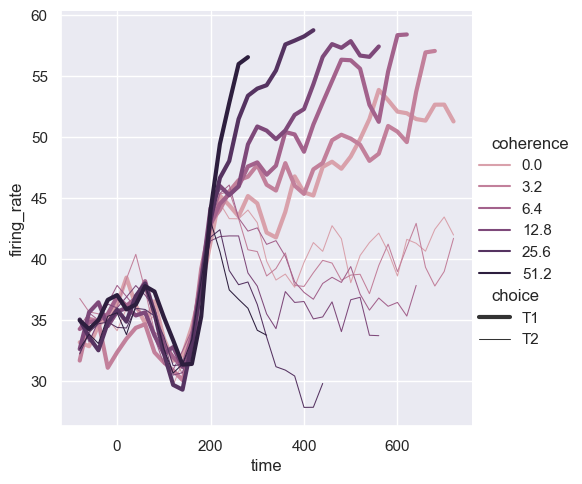

In [24]:
sns.relplot(
    data=dots, kind="line",
    x="time", y="firing_rate",
    hue="coherence", size="choice", palette=palette,
)

**Controlling sorting and orientation**  
lineplot()은 보통 x의 함수로 y를 그리려고 한다고 가정하기 때문에 기본적으로 플로팅하기 전 x 값을 기준으로 데이터를 정렬합니다.  
하지만 데이터 순서 변경을 원치 않을 경우 다음과 같이 비활성화할 수 있습니다.

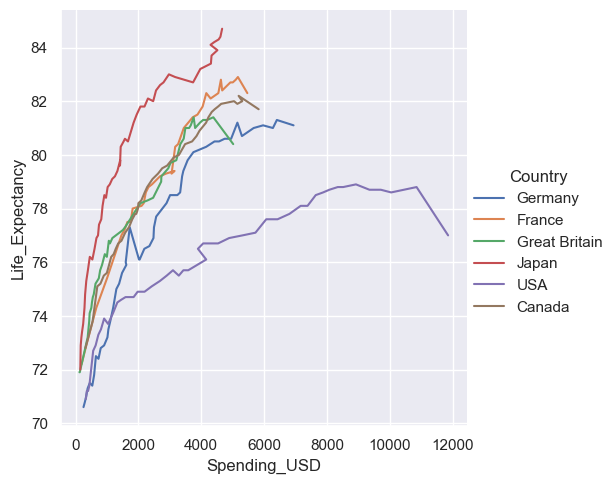

In [31]:
healthexp = sns.load_dataset("healthexp").sort_values("Year")
sns.relplot(
    data=healthexp, kind="line",
    x="Spending_USD", y="Life_Expectancy", hue="Country",
    sort=False
)

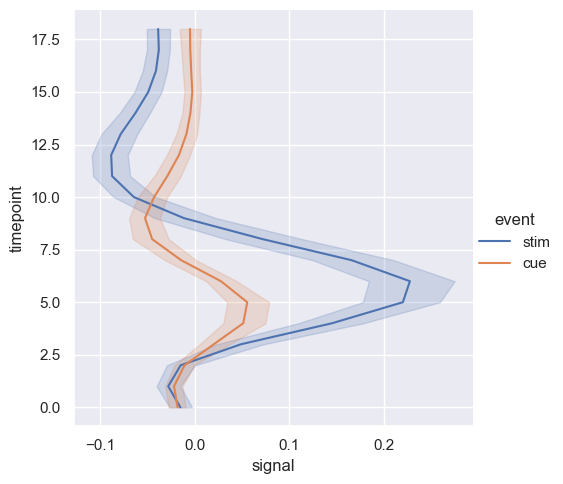

In [32]:
# y축 방향으로 정렬 및 집계 가능
sns.relplot(
    data=fmri, kind="line",
     x="signal", y="timepoint", hue="event",
    orient="y",
)